In [ ]:
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
!mkdir ~/.kaggle

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!kaggle datasets download -d phucthaiv02/butterfly-image-classification

Dataset URL: https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification
License(s): CC0-1.0
 51% 116M/226M [00:00<00:00, 1.21GB/s]
100% 226M/226M [00:00<00:00, 641MB/s] 


In [ ]:
!unzip /content/butterfly-image-classification.zip -d /content/output_dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/output_dataset/train/Image_2348.jpg  
  inflating: /content/output_dataset/train/Image_2349.jpg  
  inflating: /content/output_dataset/train/Image_235.jpg  
  inflating: /content/output_dataset/train/Image_2350.jpg  
  inflating: /content/output_dataset/train/Image_2351.jpg  
  inflating: /content/output_dataset/train/Image_2352.jpg  
  inflating: /content/output_dataset/train/Image_2353.jpg  
  inflating: /content/output_dataset/train/Image_2354.jpg  
  inflating: /content/output_dataset/train/Image_2355.jpg  
  inflating: /content/output_dataset/train/Image_2356.jpg  
  inflating: /content/output_dataset/train/Image_2357.jpg  
  inflating: /content/output_dataset/train/Image_2358.jpg  
  inflating: /content/output_dataset/train/Image_2359.jpg  
  inflating: /content/output_dataset/train/Image_236.jpg  
  inflating: /content/output_dataset/train/Image_2360.jpg  
  inflating: /content/output_dataset/train/Image_23

In [ ]:
import pandas as pd
import os
import shutil

# Load your CSV
csv_path = '/content/output_dataset/Training_set.csv'  # adjust path if needed
df = pd.read_csv(csv_path)

# Original images directory
source_dir = '/content/output_dataset/train'  # where all images are currently located

# New organized training directory
target_root = '/content//output_dataset/train_sorted'

# Create target root directory if it doesn't exist
os.makedirs(target_root, exist_ok=True)

# Move images into folders based on label
for index, row in df.iterrows():
    filename = row['filename']
    label = row['label']

    src_path = os.path.join(source_dir, filename)
    dest_dir = os.path.join(target_root, label)
    dest_path = os.path.join(dest_dir, filename)

    # Create label directory if needed
    os.makedirs(dest_dir, exist_ok=True)

    # Copy image
    if os.path.exists(src_path):
        shutil.copy(src_path, dest_path)
    else:
        print(f"Image not found: {src_path}")


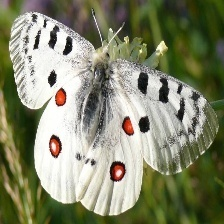

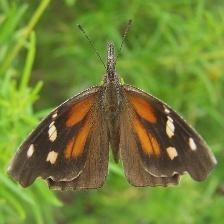

In [ ]:
import os
import random
from IPython.display import Image, display

def show_random_image(class_name):
    folder_path = f'/content/output_dataset/train_sorted/{class_name}'
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

    if not image_files:
        print(f"No images found in {folder_path}")
        return

    selected_image = random.choice(image_files)
    image_path = os.path.join(folder_path, selected_image)
    display(Image(filename=image_path))

# Example usage:
show_random_image('APPOLLO')
show_random_image('AMERICAN SNOOT')


In [ ]:
# Step 1: Import required libraries
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from IPython.display import Image, display


In [ ]:
# Step 2: Set train and test data paths
trainpath = "/content/output_dataset/train_sorted"
testpath = "/content/output_dataset/test"

In [ ]:
# Load test CSV
test_df = pd.read_csv('/content/output_dataset/Testing_set.csv')

# Generator for test (no labels)
test_datagen = ImageDataGenerator(rescale=1./255)

test = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory='/content/output_dataset/test',
    x_col='filename',
    y_col=None,  # No labels
    target_size=(224, 224),
    class_mode=None,
    batch_size=20,
    shuffle=False  # Important for correct prediction mapping
)


Found 2786 validated image filenames.


In [ ]:
# Step 3: Create ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, shear_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
# Step 4: Load data from folders
train = train_datagen.flow_from_directory(trainpath, target_size=(224, 224), batch_size=20)
test = test_datagen.flow_from_directory(testpath, target_size=(224, 224), batch_size=20)

Found 6499 images belonging to 75 classes.
Found 0 images belonging to 0 classes.


In [ ]:
labels = train.class_indices  # dictionary: {'ADONIS': 0, 'AMERICAN_SNOOT': 1, ...}

# To get an ordered list (index → label):
ordered_labels = list(labels.keys())
print("Model class order:", ordered_labels)

Model class order: ['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88', 'APPOLLO', 'ATALA', 'BANDED ORANGE HELICONIAN', 'BANDED PEACOCK', 'BECKERS WHITE', 'BLACK HAIRSTREAK', 'BLUE MORPHO', 'BLUE SPOTTED CROW', 'BROWN SIPROETA', 'CABBAGE WHITE', 'CAIRNS BIRDWING', 'CHECQUERED SKIPPER', 'CHESTNUT', 'CLEOPATRA', 'CLODIUS PARNASSIAN', 'CLOUDED SULPHUR', 'COMMON BANDED AWL', 'COMMON WOOD-NYMPH', 'COPPER TAIL', 'CRECENT', 'CRIMSON PATCH', 'DANAID EGGFLY', 'EASTERN COMA', 'EASTERN DAPPLE WHITE', 'EASTERN PINE ELFIN', 'ELBOWED PIERROT', 'GOLD BANDED', 'GREAT EGGFLY', 'GREAT JAY', 'GREEN CELLED CATTLEHEART', 'GREY HAIRSTREAK', 'INDRA SWALLOW', 'IPHICLUS SISTER', 'JULIA', 'LARGE MARBLE', 'MALACHITE', 'MANGROVE SKIPPER', 'MESTRA', 'METALMARK', 'MILBERTS TORTOISESHELL', 'MONARCH', 'MOURNING CLOAK', 'ORANGE OAKLEAF', 'ORANGE TIP', 'ORCHARD SWALLOW', 'PAINTED LADY', 'PAPER KITE', 'PEACOCK', 'PINE WHITE', 'PIPEVINE SWALLOW', 'POPINJAY', 'PURPLE HAIRSTREAK', 'PURPLISH COPPER', 'QUESTION

In [ ]:
# Step 5: Load VGG16 base model without the top layer
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Step 6: Freeze all layers in VGG16
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
# Step 7: Add custom layers on top
x = Flatten()(vgg.output)
output = Dense(75, activation='softmax')(x)  # Use 75 for your 75 classes
vgg16 = Model(vgg.input, output)


In [ ]:
# Step 8: Compile the model
vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Step 9: Summary of the model
vgg16.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 75)             │     1,881,675 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,596,363 (63.31 MB)

 Trainable params: 1,881,675 (7.18 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
from keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input

# Define your trained VGG16 model
# (Assume it's named `vgg16` and already loaded/trained)
# Also assume `labels` is a list mapping class indices to names

# Define the image path (adjust as needed)
img_path = '/content/output_dataset/train_sorted/ADONIS/Image_2255.jpg'

# Load and preprocess image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = preprocess_input(img_array)
img_array = np.expand_dims(img_array, axis=0)

# Predict
predictions = vgg16.predict(img_array)
print(predictions)
predicted_class_index = np.argmax(predictions, axis=1)[0]
# Map class index to name
print(predicted_class_index)
predicted_class_name = ordered_labels[predicted_class_index]

print(f"Predicted Class Index: {predicted_class_index}")
print(f"Predicted Class Name: {predicted_class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 847ms/step
[[2.22367717e-18 7.58017619e-28 1.20448614e-17 1.78476632e-13
  7.62874248e-19 6.24048338e-24 8.70386167e-26 3.49095588e-22
  4.09891664e-26 2.27132202e-11 7.61250743e-30 4.46766784e-18
  9.99999881e-01 2.93909505e-23 7.16303514e-21 6.41118094e-15
  2.41942833e-19 3.99512645e-21 1.50675692e-19 0.00000000e+00
  5.26314144e-23 1.92699043e-16 2.02045296e-18 4.10084370e-32
  4.43026651e-24 2.73343108e-38 3.27457108e-24 7.23597445e-22
  3.93480664e-22 2.78607237e-12 9.60201494e-25 1.74983751e-18
  8.86052621e-15 7.74953840e-24 9.77633146e-15 1.81251343e-31
  8.42969522e-28 5.85204977e-23 4.03866152e-20 2.57060080e-33
  1.76127400e-20 1.15879067e-30 0.00000000e+00 1.92293034e-23
  5.19201079e-23 3.42251016e-28 2.24639011e-18 8.06040686e-14
  7.23756318e-18 1.06761775e-07 5.54188883e-19 1.12434004e-35
  3.28836731e-23 8.05665435e-22 2.49227507e-16 1.21151516e-22
  1.51169693e-26 2.81615455e-25 1.98045501e-30 7.20187913e-23
  7.31655186e-22 4.30662621e-31

In [ ]:
vgg16.save("vgg16_model.h5")